In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import plotly.express as px

In [ ]:

data_dir = '/content/drive/MyDrive/Project-data/combined.csv'
df = pd.read_csv(data_dir)


In [ ]:
df = df.sample(frac = 1)

In [ ]:
px.box(df, x='Current', y='Temperature', color = 'Current')

Temperature vs charging or discharging

charging = 1
discharging = 2

In [ ]:
px.box(df, x = 'Charge/Discharge',  y = 'Temperature', color = 'Charge/Discharge')

Text(0, 0.5, 'Temperature')

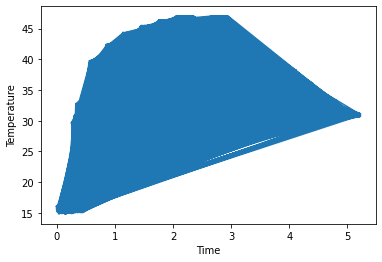

In [ ]:
plt.plot(df.iloc[:,2], df.iloc[:,3])
plt.xlabel("Time")
plt.ylabel("Temperature")

In [ ]:
dfa40 = pd.read_csv('/content/drive/MyDrive/Project-data/5a_40A.csv')
dfa45 = pd.read_csv('/content/drive/MyDrive/Project-data/5a_45A.csv')
dfa50 = pd.read_csv('/content/drive/MyDrive/Project-data/5a_50A.csv')
dfa60 = pd.read_csv('/content/drive/MyDrive/Project-data/5a_60A.csv')
dfb40 = pd.read_csv('/content/drive/MyDrive/Project-data/5b_40A.csv')
dfb45 = pd.read_csv('/content/drive/MyDrive/Project-data/5b_45A.csv')
dfb50 = pd.read_csv('/content/drive/MyDrive/Project-data/5b_50A.csv')
dfb60 = pd.read_csv('/content/drive/MyDrive/Project-data/5b_60A.csv')

Text(0.5, 1.0, '40A, Charging')

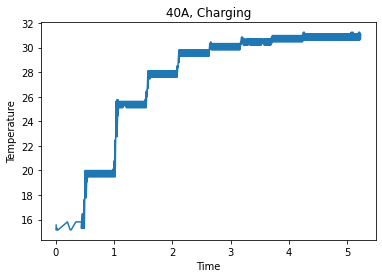

In [ ]:
plt.plot(dfa40.iloc[:,0], dfa40.iloc[:,1])
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.title("40A, Charging")

Text(0.5, 1.0, '45A, Charging')

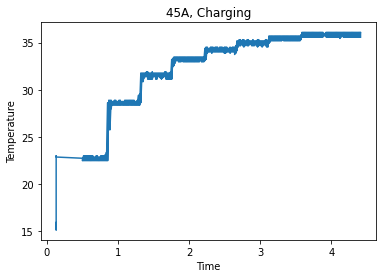

In [ ]:
plt.plot(dfa45.iloc[:,0], dfa45.iloc[:,1])
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.title("45A, Charging")

Text(0.5, 1.0, '50A, Charging')

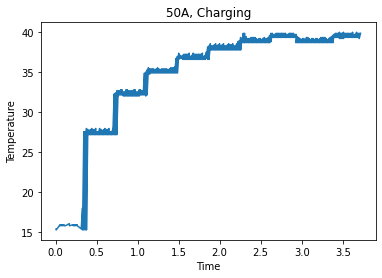

In [ ]:
plt.plot(dfa50.iloc[:,0], dfa50.iloc[:,1])
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.title("50A, Charging")

Text(0.5, 1.0, '60A, Charging')

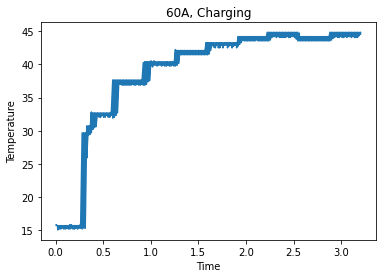

In [ ]:
plt.plot(dfa60.iloc[:,0], dfa60.iloc[:,1])
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.title("60A, Charging")

Text(0.5, 1.0, '40A, Discharging')

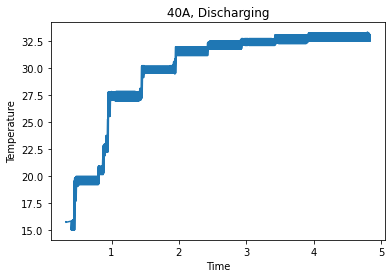

In [ ]:
plt.plot(dfb40.iloc[:,0], dfb40.iloc[:,1])
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.title("40A, Discharging")

Text(0.5, 1.0, '45A, Discharging')

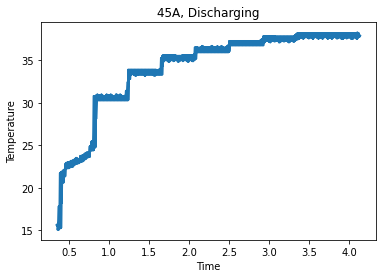

In [ ]:
plt.plot(dfb45.iloc[:,0], dfb45.iloc[:,1])
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.title("45A, Discharging")

Text(0.5, 1.0, '50A, Discharging')

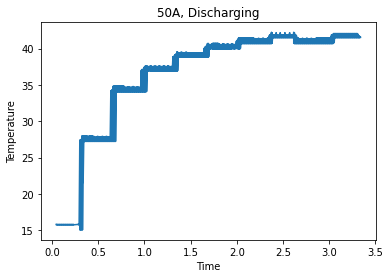

In [ ]:
plt.plot(dfb50.iloc[:,0], dfb50.iloc[:,1])
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.title("50A, Discharging")

Text(0.5, 1.0, '60A, Discharging')

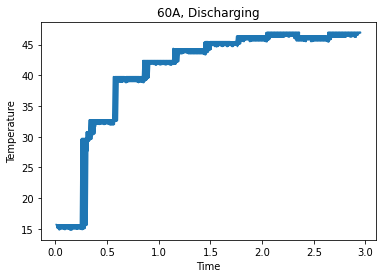

In [ ]:
plt.plot(dfb60.iloc[:,0], dfb60.iloc[:,1])
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.title("60A, Discharging")

Training Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,0:3]
y = df.iloc[:,3]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

KNN Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=10)
neigh.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [ ]:
neigh.score(X_test, y_test)

0.9885186733584079

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y_test,neigh.predict(X_test))

0.6486681210960196

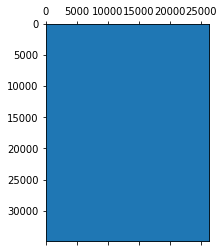

In [ ]:
plot = neigh.kneighbors_graph(X)
plt.spy(plot)

In [ ]:
def plot_feature_importance(reg,df):
  feature_importance = reg.feature_importances_
  sorted_idx = np.argsort(feature_importance)
  pos = np.arange(sorted_idx.shape[0]) + .5
  fig = plt.figure(figsize=(12, 6))
  plt.barh(pos, feature_importance[sorted_idx], align='center')
  plt.yticks(pos, np.array(df.columns[0:])[sorted_idx])
  plt.title('Feature Importance')
  fig.savefig('/content/drive/MyDrive/Project-data/gradient_boost_feature_importance.png')

In [ ]:
params = {'n_estimators': 1000,
          'max_depth': 8,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'squared_error'}

In [ ]:
from sklearn import ensemble
from sklearn.inspection import permutation_importance
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)
mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) is: {:.4f}".format(mse))

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:286: FutureWarning:

The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.



The mean squared error (MSE) for runtime is: 0.6055


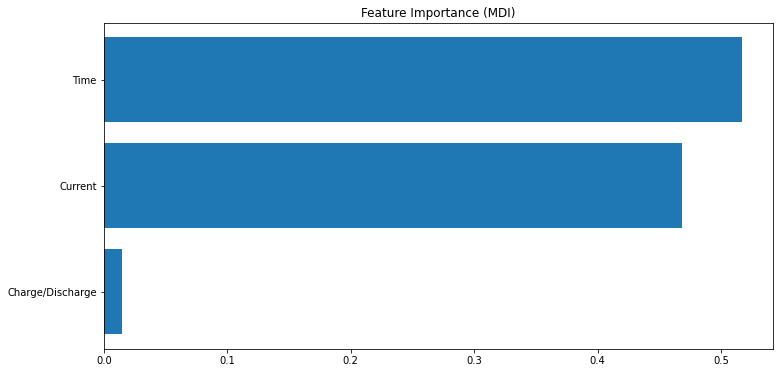

In [ ]:
plot_feature_importance(reg, df)

In [ ]:
reg.score(X_test, y_test)

0.9892832593268721

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)

LinearRegression()

In [ ]:
mse = mean_squared_error(y_test, regr.predict(X_test))
mse

21.045502084490174

In [ ]:
regr.score(X_test, y_test)

0.627497828380917

From the graphs, we saw that linear regression would now be a good fit. Applying polynomial regression now

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import explained_variance_score
import statistics
for i in range(2,20):
  poly = PolynomialFeatures(degree=i, include_bias=False)
  X_train_poly = poly.fit_transform(X_train)
  polyregr = linear_model.LinearRegression()
  polyregr.fit(X_train_poly,y_train)
  X_test_poly = poly.fit_transform(X_test)
  mse = mean_squared_error(y_test, polyregr.predict(X_test_poly))
  print("MSE for ", i, "polynomial features is : ", mse)
  print("Score for regressor with ", i, "polynomial fearures is : ", polyregr.score(X_test_poly, y_test))
  pred_y = polyregr.predict(X_test_poly)
  print("Variance score : ", explained_variance_score(y_test, pred_y))
  print("Variance : ", statistics.variance(pred_y))

MSE for  2 polynomial features is :  7.980013140509363
Score for regressor with  2 polynomial fearures is :  0.8587549865783796
Variance score :  0.8587975934921841
Variance :  48.62018132817079
MSE for  3 polynomial features is :  3.8086308898014924
Score for regressor with  3 polynomial fearures is :  0.9325878151231124
Variance score :  0.9326000611802123
Variance :  53.42750387475815
MSE for  4 polynomial features is :  2.415912043709298
Score for regressor with  4 polynomial fearures is :  0.9572387259230261
Variance score :  0.9572622142951559
Variance :  54.89181097978116
MSE for  5 polynomial features is :  2.0903893780901557
Score for regressor with  5 polynomial fearures is :  0.9630004273719892
Variance score :  0.9630271501449114
Variance :  55.5013327042514
MSE for  6 polynomial features is :  2.047492543225223
Score for regressor with  6 polynomial fearures is :  0.963759694795433
Variance score :  0.9637886339055466
Variance :  55.65254968051087
MSE for  7 polynomial fea